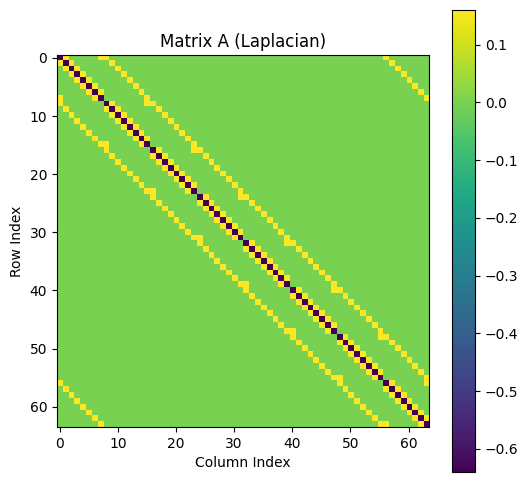

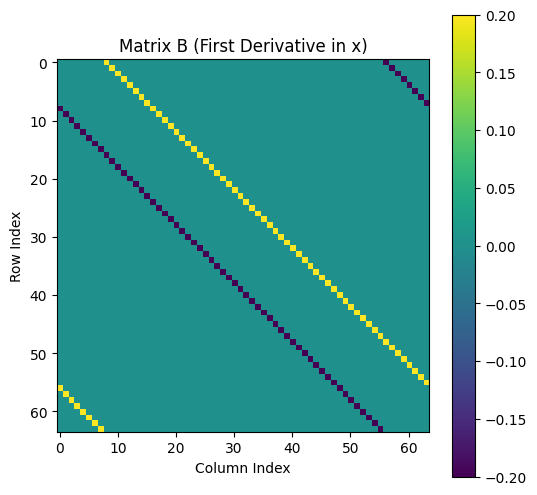

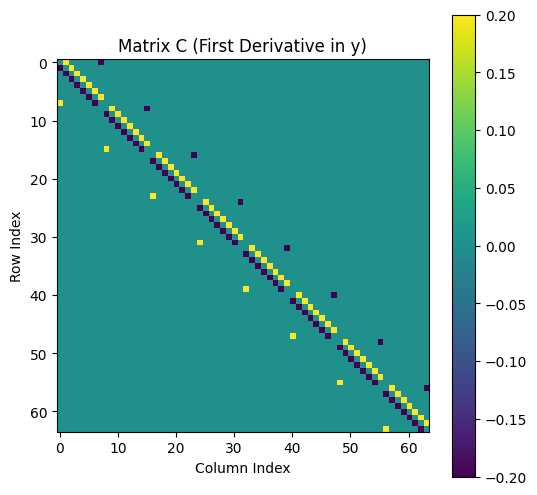

In [7]:
import numpy as np
from scipy.sparse import spdiags, kron, eye
import matplotlib.pyplot as plt

# Parameters
L = 10  # Domain limit [-L, L] for x and y
n = 8   # Number of grid points in each direction
h = 2 * L / n  # Grid spacing

# Define finite difference stencils for second and first derivatives
second_derivative = np.array([1, -2, 1]) / (h**2)
first_derivative = np.array([-1, 0, 1]) / (2 * h)

# Construct 1D second-derivative matrix with periodic BCs
D2_1d = spdiags([second_derivative[0] * np.ones(n), 
                 second_derivative[1] * np.ones(n), 
                 second_derivative[2] * np.ones(n)], 
                [-1, 0, 1], n, n, format="csr")
D2_1d[0, -1] = second_derivative[0]  # Periodic boundary
D2_1d[-1, 0] = second_derivative[2]  # Periodic boundary

# Construct 1D first-derivative matrix with periodic BCs for x
D1x_1d = spdiags([first_derivative[0] * np.ones(n), 
                  first_derivative[1] * np.ones(n), 
                  first_derivative[2] * np.ones(n)], 
                 [-1, 0, 1], n, n, format="csr")
D1x_1d[0, -1] = first_derivative[0]  # Periodic boundary
D1x_1d[-1, 0] = first_derivative[2]  # Periodic boundary

# Construct 2D operators using Kronecker products
I = eye(n)  # Identity matrix of size n
A = kron(I, D2_1d) + kron(D2_1d, I)  # Laplacian ∂^2_x + ∂^2_y
C = kron(I, D1x_1d)                  # First derivative ∂y in 2D
B = kron(D1x_1d, I)                  # First derivative ∂x in 2D

# Convert sparse matrices to full (dense) format
A_full = A.toarray()
B_full = B.toarray()
C_full = C.toarray()

A1 = A_full
A2 = B_full
A3 = C_full


def plot_matrix(matrix, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(matrix, cmap="viridis", interpolation="none")
    plt.colorbar()
    plt.title(title)
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    plt.show()

# Plot each matrix
plot_matrix(A1, "Matrix A (Laplacian)")
plot_matrix(A2, "Matrix B (First Derivative in x)")
plot_matrix(A3, "Matrix C (First Derivative in y)")

